<a href="https://colab.research.google.com/github/DrVenkataRajeshKumar/S11/blob/master/S11trail6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-g8t22tnm
All libraries are successfully installed!


In [4]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
for data, l in tqdm_notebook(train):
  x = np.array(data)/255
  s += x.sum(axis=(0,1))
  sq += np.sum(np.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = np.sqrt((sq/n - np.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



[0.49139968 0.48215841 0.44653091] [0.30249857 0.29176174 0.26781806] [0.24703223 0.24348513 0.26158784] 51200000


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA4')

In [0]:
import numpy as np
from eva4albumentations import AlbumentationTransforms
import albumentations as A


channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
# Train Phase transformations
train_transforms = AlbumentationTransforms([
                                       A.PadIfNeeded(40,40),
                                       A.RandomCrop(32,32),
                                       A.HorizontalFlip(),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(8)
                                       ])

fillmeans = (np.array(channel_means)).astype(np.uint8)



# Test Phase transformations
test_transforms = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])



In [7]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import eva4dataloaders

dataloader = eva4dataloaders.DataLoader()

# train dataloader
train_loader = dataloader.load(train)

# test dataloader
test_loader = dataloader.load(test)

In [9]:

import numpy as np
dataiter = iter(train_loader)
images, labels = dataiter.next()
i = images[90].numpy()
print(np.max(i), np.min(i))

2.058842 -1.642012


torch.Size([512, 3, 32, 32])
torch.Size([512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


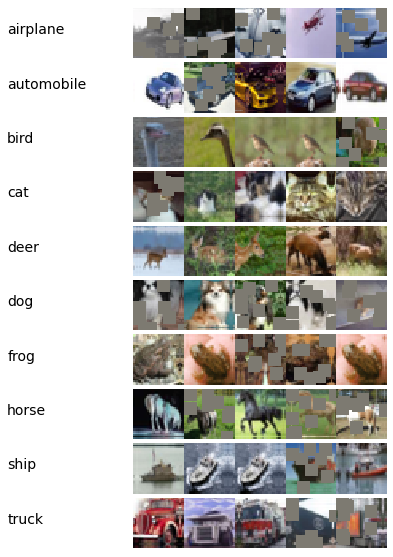

In [10]:

from __future__ import print_function

def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [11]:
import a11
import torch

model = a11.Quiz11()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
model.summary((3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
              ReLU-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
            Conv2d-8          [-1, 128, 16, 16]         147,456
              ReLU-9          [-1, 128, 16, 16]               0
      BatchNorm2d-10          [-1, 128, 16, 16]             256
           Conv2d-11          [-1, 128, 16, 16]         147,456
             ReLU-12          [-1, 128, 16, 16]               0
      BatchNorm2d-13          [-1, 128, 16, 16]             256
           Conv2d-14          [-1, 256,

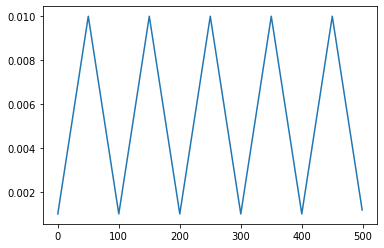

In [12]:

def get_triangular_lr(iteration, stepsize, base_lr, max_lr):
    """Given the inputs, calculates the lr that should be applicable for this iteration"""
    cycle = np.floor(1 + iteration/(2  * stepsize))
    x = np.abs(iteration/stepsize - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1-x))
    return lr


num_iterations = 500
stepsize = 50
base_lr = 0.001
max_lr = 0.01
lr_trend = list()

for iteration in range(num_iterations):
    lr = get_triangular_lr(iteration, stepsize, base_lr, max_lr)
    # Update your optimizer to use this learning rate in this iteration
    lr_trend.append(lr)

plt.plot(lr_trend)

epoch = 1 Lr = 0.001  Loss=1.42611825466156 Batch_id=97 Accuracy=40.09: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]
epoch = 2 Lr = 0.0014500000000000001  Loss=1.3117811679840088 Batch_id=97 Accuracy=41.21: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
epoch = 3 Lr = 0.0019000000000000002  Loss=1.3701913356781006 Batch_id=97 Accuracy=41.98: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
epoch = 4 Lr = 0.00235  Loss=1.385738492012024 Batch_id=97 Accuracy=42.09: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
epoch = 5 Lr = 0.0028  Loss=1.2410234212875366 Batch_id=97 Accuracy=43.01: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]
epoch = 6 Lr = 0.00325  Loss=1.428227424621582 Batch_id=97 Accuracy=43.15: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
epoch = 7 Lr = 0.0036999999999999997  Loss=1.3991868495941162 Batch_id=97 Accuracy=42.74: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
epoch = 8 Lr = 0.00415  Loss=1.46579110622406 Batch_id=97 Accuracy=43.08: 100%|██████████| 98/98 

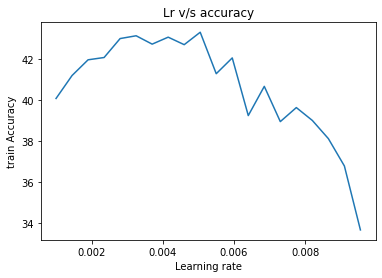

In [13]:
import LR_Range_Test
from LR_Range_Test import LR_test
import torch.nn as nn
max_lr = 0.01
base_lr = 0.001
epoch = 20
criterion = nn.NLLLoss()

LR_test(max_lr, base_lr, model.device, epoch, model, criterion, train_loader, momemtum  =0.9, weight_decay=0.01, plot= True)


  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


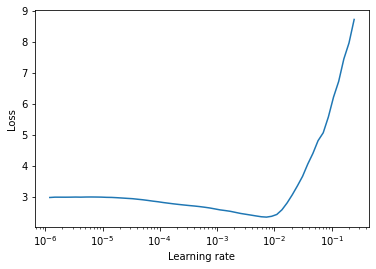

In [14]:
from lrfinder import LRFinder
import torch.optim as optim
import torch.nn as nn
L1lambda = 0
L2lambda = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9, nesterov=True, weight_decay=L2lambda)
lr_finder = LRFinder(model, optimizer, criterion, device=model.device)
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state
lr_finder.reset()

In [15]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
device = model.device


EPOCHS = 25
#scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=L2lambda)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                 max_lr=0.03,
                 total_steps=25,
                 epochs=25,
                 pct_start=0.2,
                 cycle_momentum=False,
                 base_momentum=0.85,
                 max_momentum=0.95,
                 div_factor=10.,
                 final_div_factor=1e4,
                 last_epoch=-1)



model.gotrain(optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive", scheduler, False, L1lambda)


Validation loss decreased (100000.000000 --> 1.198378).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0031, Accuracy: 44.44%; Test set: Average loss: 1.1984, Accuracy: 57.74%
Learning Rate = 0.003000



Epoch: 2, Train set: Average loss: 0.0027, Accuracy: 53.38%; Test set: Average loss: 1.2288, Accuracy: 59.40%
Learning Rate = 0.006954



Validation loss decreased (1.198378 --> 1.063644).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0035, Accuracy: 50.33%; Test set: Average loss: 1.0636, Accuracy: 63.57%
Learning Rate = 0.016500



Validation loss decreased (1.063644 --> 0.877828).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0024, Accuracy: 59.76%; Test set: Average loss: 0.8778, Accuracy: 70.02%
Learning Rate = 0.026046



Validation loss decreased (0.877828 --> 0.692324).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0019, Accuracy: 67.02%; Test set: Average loss: 0.6923, Accuracy: 75.97%
Learning Rate = 0.030000



Validation loss decreased (0.692324 --> 0.626555).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0016, Accuracy: 71.71%; Test set: Average loss: 0.6266, Accuracy: 78.54%
Learning Rate = 0.029815



Epoch: 7, Train set: Average loss: 0.0014, Accuracy: 75.26%; Test set: Average loss: 0.6301, Accuracy: 78.49%
Learning Rate = 0.029266



Validation loss decreased (0.626555 --> 0.529347).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0013, Accuracy: 77.89%; Test set: Average loss: 0.5293, Accuracy: 81.95%
Learning Rate = 0.028365



Validation loss decreased (0.529347 --> 0.519773).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0012, Accuracy: 79.28%; Test set: Average loss: 0.5198, Accuracy: 83.02%
Learning Rate = 0.027135



Validation loss decreased (0.519773 --> 0.493247).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0011, Accuracy: 80.95%; Test set: Average loss: 0.4932, Accuracy: 83.81%
Learning Rate = 0.025607



Validation loss decreased (0.493247 --> 0.448599).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0010, Accuracy: 82.56%; Test set: Average loss: 0.4486, Accuracy: 85.04%
Learning Rate = 0.023817



Validation loss decreased (0.448599 --> 0.423173).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0009, Accuracy: 83.37%; Test set: Average loss: 0.4232, Accuracy: 86.05%
Learning Rate = 0.021810



Validation loss decreased (0.423173 --> 0.402593).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0009, Accuracy: 84.66%; Test set: Average loss: 0.4026, Accuracy: 86.44%
Learning Rate = 0.019635



Validation loss decreased (0.402593 --> 0.378530).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0008, Accuracy: 85.52%; Test set: Average loss: 0.3785, Accuracy: 87.41%
Learning Rate = 0.017347



Epoch: 15, Train set: Average loss: 0.0007, Accuracy: 86.71%; Test set: Average loss: 0.3822, Accuracy: 87.59%
Learning Rate = 0.015000



Validation loss decreased (0.378530 --> 0.362025).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0007, Accuracy: 87.25%; Test set: Average loss: 0.3620, Accuracy: 88.01%
Learning Rate = 0.012654



Validation loss decreased (0.362025 --> 0.330172).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0006, Accuracy: 88.50%; Test set: Average loss: 0.3302, Accuracy: 89.24%
Learning Rate = 0.010365



Epoch: 18, Train set: Average loss: 0.0006, Accuracy: 88.94%; Test set: Average loss: 0.3323, Accuracy: 89.36%
Learning Rate = 0.008190



Validation loss decreased (0.330172 --> 0.318881).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0006, Accuracy: 89.40%; Test set: Average loss: 0.3189, Accuracy: 89.58%
Learning Rate = 0.006183



Validation loss decreased (0.318881 --> 0.306453).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0005, Accuracy: 90.12%; Test set: Average loss: 0.3065, Accuracy: 89.80%
Learning Rate = 0.004394



Validation loss decreased (0.306453 --> 0.301715).  Saving model ...
Epoch: 21, Train set: Average loss: 0.0005, Accuracy: 90.65%; Test set: Average loss: 0.3017, Accuracy: 90.07%
Learning Rate = 0.002865



Validation loss decreased (0.301715 --> 0.300557).  Saving model ...
Epoch: 22, Train set: Average loss: 0.0005, Accuracy: 90.97%; Test set: Average loss: 0.3006, Accuracy: 90.18%
Learning Rate = 0.001635



Validation loss decreased (0.300557 --> 0.297573).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0005, Accuracy: 91.11%; Test set: Average loss: 0.2976, Accuracy: 90.19%
Learning Rate = 0.000734



Validation loss decreased (0.297573 --> 0.295597).  Saving model ...
Epoch: 24, Train set: Average loss: 0.0005, Accuracy: 91.45%; Test set: Average loss: 0.2956, Accuracy: 90.30%
Learning Rate = 0.000185



Validation loss decreased (0.295597 --> 0.294794).  Saving model ...
Epoch: 25, Train set: Average loss: 0.0005, Accuracy: 91.42%; Test set: Average loss: 0.2948, Accuracy: 90.31%
Learning Rate = 0.000000



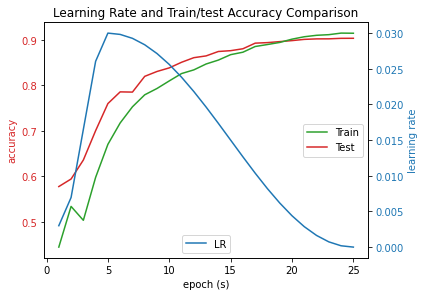

In [16]:
fig, ax1 = plt.subplots()
t = np.arange(1, 26)
color = 'tab:red'
ax1.set_xlabel('epoch (s)')
ax1.set_ylabel('accuracy', color=color)
testline, = ax1.plot(t, model.stats().test_acc, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
trainline, = ax1.plot(t, model.stats().train_acc, color=color)
ax1.legend((trainline, testline), ('Train', 'Test'), loc=7)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)  # we already handled the x-label with ax1
lrline, = ax2.plot(t, model.stats().lr, color=color)
ax2.legend((lrline, ), ('LR',), loc=8)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Learning Rate and Train/test Accuracy Comparison")
plt.show()